In [159]:
#import nessessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [161]:
# dataset is loaded
mall_data = pd.read_csv('Mall_Customers.csv')

# missing values ate filled by taking mean of columns
mall_data.fillna(mall_data.mean(numeric_only=True), inplace=True)

#data is standardized
scaler = StandardScaler()
mall_data_scaled = mall_data.copy()
mall_data_scaled[["Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(
    mall_data[["Annual Income (k$)", "Spending Score (1-100)"]])


In [163]:
mall_data.info()
print (mall_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                

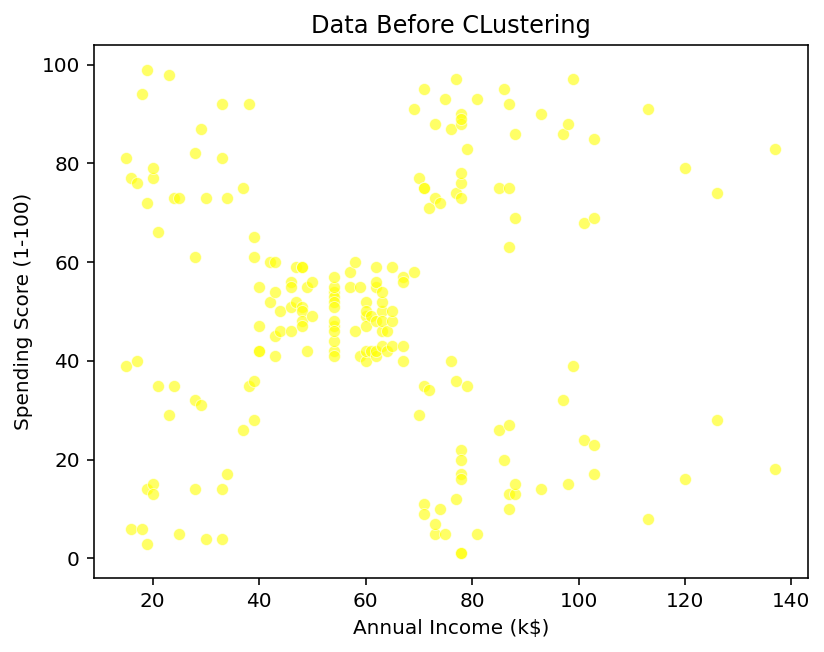

In [165]:
def plot_relational_graph(mall_data):
    """
    plotted a scatter plot which shows relationship between annual income and spending score of male and female
    """
    plt.figure(dpi=144)
    
    # scatter plot is created
    sns.scatterplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.6, color = "yellow")
    
    # title and label for axis are are added
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Data Before CLustering')
    
    # functon is called and plot is shown
    plt.show()
plot_relational_graph(mall_data)

In [167]:
# Select columns for normalization
data = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Normalize the data to range [0, 1]
scaler = MinMaxScaler()
norm = scaler.fit_transform(data)

In [169]:
def one_silhoutte(n, xy):
    """
    Calculates the silhoutte score for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    return score

In [171]:
# can automate the looking at cluster numbers 
best_n, best_score = None, -np.inf
for n in range(2, 11): # 2 to 10 clusters
    score = one_silhouette(n, data)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")
    
print(f"Best number of clusters = {best_n:2g}")

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

 2 clusters silhoutte score = 0.40
 3 clusters silhoutte score = 0.47
 4 clusters silhoutte score = 0.49
 5 clusters silhoutte score = 0.55
 6 clusters silhoutte score = 0.51
 7 clusters silhoutte score = 0.50
 8 clusters silhoutte score = 0.50
 9 clusters silhoutte score = 0.46
10 clusters silhoutte score = 0.44
Best number of clusters =  5


D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [173]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red',facecolors='none',
               s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

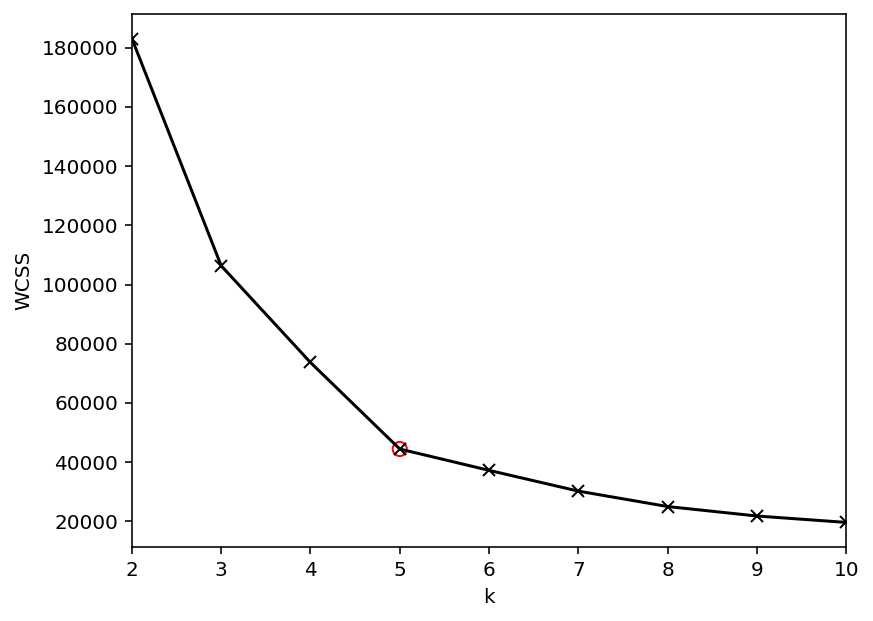

In [175]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plot_elbow_method(2, 10, wcss, best_n)


D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Agha Saud Khan\AppData\Local\Temp\ipykernel_9720\1299198292.py:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')
C:\Users\Agha Saud Khan\AppData\Local\Temp\ipykernel_9720\1299198292.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')


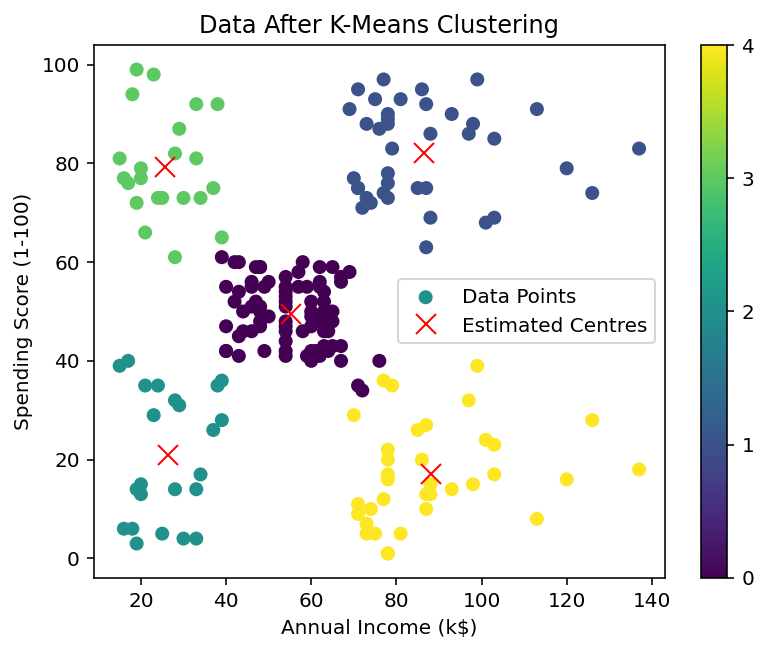

In [177]:
def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with determined centres calcualted
    """

    # Set the number of clusters
    ncluster = 5

    # Set up the KMeans clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=ncluster, n_init=20)

    # Fit the model to the data
    kmeans.fit(data)

    # Get the labels for each data point (cluster assignment)
    labels = kmeans.labels_

    # Get the estimated cluster centers
    cen = kmeans.cluster_centers_
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    fig, ax = plt.subplots(dpi=144)
    
    # Scatter plot of the data, colored by cluster labels
    s = ax.scatter(x, y, c=labels, cmap='viridis', marker='o', label='Data Points')

    # Plot the estimated cluster centers
    ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')

    # Color bar for the scatter plot
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    
    # Labels and legend
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.legend()
    ax.set_title('Data After K-Means Clustering')
    plt.show()

# Call the function to plot the results
plot_fitted_clusters()